# E COMMERCE CUSTOMER CHURN 

#### By Amjad Muhammad Ahsan 

# INTRODUCTION

## Context

The dataset used in this project originates from a leading E-commerce company that operates an online retail platform. As part of their customer retention strategy, the company aims to proactively identify customers who are likely to churn—i.e., stop using their services or placing new orders.

In the highly competitive world of online shopping, customer loyalty and retention are critical to long-term profitability. Losing a customer not only impacts immediate revenue but also increases customer acquisition costs due to the need to replace lost users. To mitigate this risk, the company wants to predict churn behavior based on various customer attributes such as order history, satisfaction score, complaint records, and cashback habits.

By identifying high-risk churn customers in advance, the business can implement targeted marketing campaigns, personalized promotions, and proactive outreach to retain them—maximizing Customer Lifetime Value (CLV) and reducing revenue leakage.

This project aims to build a classification model that can accurately distinguish between customers likely to stay and those likely to churn, enabling the company to take data-driven action toward improving customer retention.

### PROBLEM

The E-commerce company is currently unable to identify customers who are at risk of churning. As a result, they are reactive rather than proactive in their retention strategies, often realizing customer loss only after it occurs. This leads to decreased revenue, reduced customer lifetime value, and increased marketing costs to reacquire lost users.

The challenge is to build a predictive machine learning model that can classify whether a customer is likely to churn (1) or not churn (0) based on their historical behavior, preferences, satisfaction level, and transaction patterns.

### GOALS FOR THIS PROJECT

- Build a classification model to predict whether a customer is likely to churn (1) or not (0) based on behavioral, transactional, and satisfaction-related features.

- Focus on high recall, so the model can accurately identify most customers at risk of churning—allowing the business to act before it's too late.

- Ensure model explainability and trustworthiness, enabling stakeholders to understand the reasons behind predictions and when the model can or cannot be relied on.

### Datqset Understanding


- The dataset is sourced from [this Google Drive folder](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves).  
- It is imbalanced, with a class ratio of approximately **1:5**.  
- The total number of samples is **3,941**.  
- It contains both **categorical and numerical** features.  


# SETUP|

### LIBRARY SETUP

In [74]:
import pandas as pd
import numpy as np

### VisuaL

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

from sklearn.metrics import (
    classification_report, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay
)
from xgboost import plot_importance



### Feature Engineering

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

### Model

In [77]:
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)




### PIPELINE

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import uniform, randint

In [79]:
from sklearn.ensemble import StackingClassifier


In [80]:
import pickle

### INSTRALLATION

In [81]:
#!pip install missingno
#!pip install xgboost
#!pip install lightgbM
#pip install imbalanced-learn

### Dataset Initiate


| Attribute                | Data Type        | Description                                              |
| ------------------------ | ---------------- | -------------------------------------------------------- |
| Tenure                   | Integer          | Tenure of a customer in the company                      |
| WarehouseToHome          | Float/Integer    | Distance between the warehouse and the customer’s home   |
| NumberOfDeviceRegistered | Integer          | Total number of devices registered to a customer         |
| PreferedOrderCat         | Text             | Preferred order category of a customer in the last month |
| SatisfactionScore        | Integer (1–5)    | Satisfaction score given by the customer                 |
| MaritalStatus            | Text             | Marital status of the customer                           |
| NumberOfAddress          | Integer          | Number of addresses associated with a customer           |
| Complaint                | Integer (0 or 1) | Whether any complaint was raised in the last month       |
| DaySinceLastOrder        | Integer          | Days since the customer last placed an order             |
| CashbackAmount           | Float            | Average cashback received by the customer last month     |
| Churn                    | Integer (0 or 1) | Target variable: 1 = churned, 0 = stayed                 |


To begin the analysis, I first imported the dataset using pandas and performed an initial inspection to understand its structure. This included calling df.head()

In [82]:
df = pd.read_csv("Documents/Amjad/Capstone Module 3/data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [84]:
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [85]:
df[df.isnull().any(axis=1)].head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1


In [86]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [87]:
df[df.isna().any(axis=1)].head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1


In [88]:
df.dtypes

Tenure                      float64
WarehouseToHome             float64
NumberOfDeviceRegistered      int64
PreferedOrderCat             object
SatisfactionScore             int64
MaritalStatus                object
NumberOfAddress               int64
Complain                      int64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
dtype: object

In [89]:
df.nunique()

Tenure                        36
WarehouseToHome               33
NumberOfDeviceRegistered       6
PreferedOrderCat               6
SatisfactionScore              5
MaritalStatus                  3
NumberOfAddress               14
Complain                       2
DaySinceLastOrder             22
CashbackAmount              2335
Churn                          2
dtype: int64

In [90]:
df.duplicated().sum()

671

To begin the analysis, I first loaded the dataset using pandas and inspected the basic structure of the data. I used df.head() to view a sample of the records, followed by df.info() to check data types and null values. Then, I used df.nunique() to examine the number of unique values in each column, and df.dtypes to confirm the data types of all features. These steps provided an initial understanding of the dataset's format, helped detect potential categorical or numerical fields, and guided the next steps in cleaning and preprocessing.

# Data Cleaning

In [91]:
columns = df.columns.to_list()
columns

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Churn']

### Checking Unique

In [92]:
for col in columns:
    if df[col].dtype == object:
        print("------------------------------------------------------------")
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
print("------------------------------------------------------------")

------------------------------------------------------------
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64
------------------------------------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
MaritalStatus
Married     2055
Single      1310
Divorced     576
Name: count, dtype: int64
------------------------------------------------------------


#### Adjusting Mobile Phone and Phone into Mobile

In [93]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [94]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile Phone': 'Mobile'
})

In [95]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others', 'Grocery'],
      dtype=object)

To simplify and standardize category labels, I replaced the value 'Mobile Phone' in the PreferedOrderCat column with 'Mobile'. This helps reduce redundancy and ensures consistent representation of similar categories during encoding and modeling.

### Checking Numberical Value

In [96]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print("------------------------------------------------------------")
        print(f"{col} : {df[col].unique()}")
        print(df[col].value_counts())
print("------------------------------------------------------------")


------------------------------------------------------------
Tenure : [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]
Tenure
1.0     489
0.0     347
8.0     192
9.0     166
10.0    155
4.0     151
7.0     151
5.0     145
11.0    136
3.0     136
6.0     134
14.0    128
12.0    127
13.0    122
2.0     117
19.0    111
15.0    103
16.0    102
20.0     80
18.0     79
17.0     79
23.0     59
21.0     54
24.0     51
22.0     50
30.0     46
28.0     44
27.0     43
26.0     41
25.0     40
29.0     33
31.0     32
61.0      1
51.0      1
60.0      1
50.0      1
Name: count, dtype: int64
------------------------------------------------------------
WarehouseToHome : [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]
WarehouseToHome
9.0      380
8.0      310
7.0      277
14.0 

### Checking For Duplicates and Removing it

In [97]:

total_rows = len(df)

num_duplicates = df.duplicated().sum()

pct_duplicates = round((num_duplicates / total_rows) * 100, 2)

# Print 
print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {num_duplicates}")
print(f"Percentage of duplicates: {pct_duplicates}%")


Total rows: 3941
Duplicate rows: 672
Percentage of duplicates: 17.05%


### #Duplicate Handling

Out of 3,941 total rows in the dataset, we found 671 exact duplicate records — approximately 17.03% of the entire data.  
These rows are full duplicates, meaning all column values are identical, including the target variable (`Churn`).

#### Why Remove Them?

- **No added information:** Exact duplicates provide no new learning signals for the model.
- **Bias risk:** Duplicate rows disproportionately emphasize certain patterns, which can bias the model toward overfitting.
- **Target skew:** The churn rate among duplicate rows is higher (20.86%) than the overall dataset (17.1%), which can distort evaluation metrics.

Thus, to ensure model generalization and fairness, these duplicates were removed using `drop_duplicates()`.


In [98]:
df = df.drop_duplicates()

In [99]:
df.duplicated().sum()

0

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3134 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3088 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


### Checking Fore Missing Value

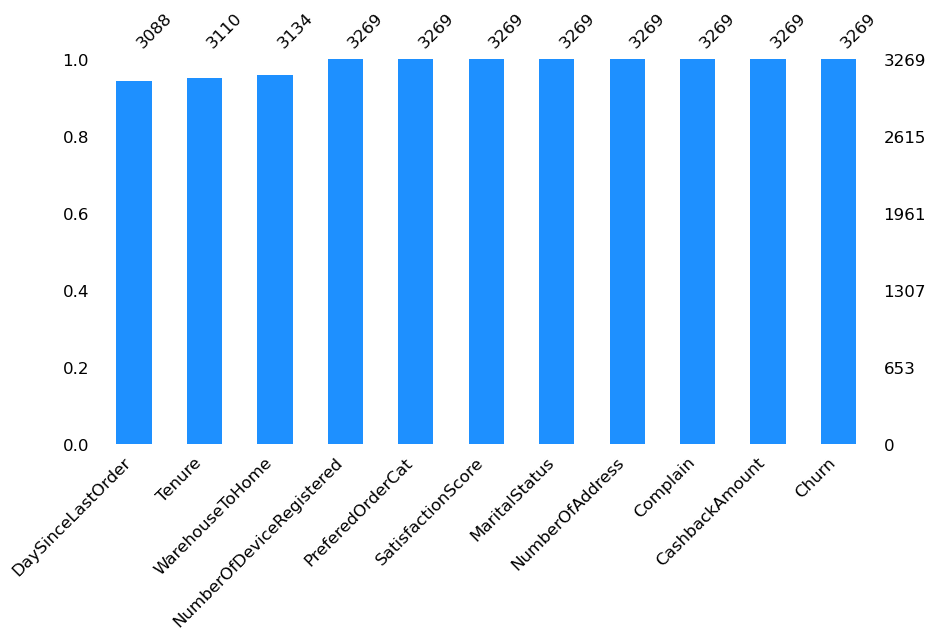

In [101]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

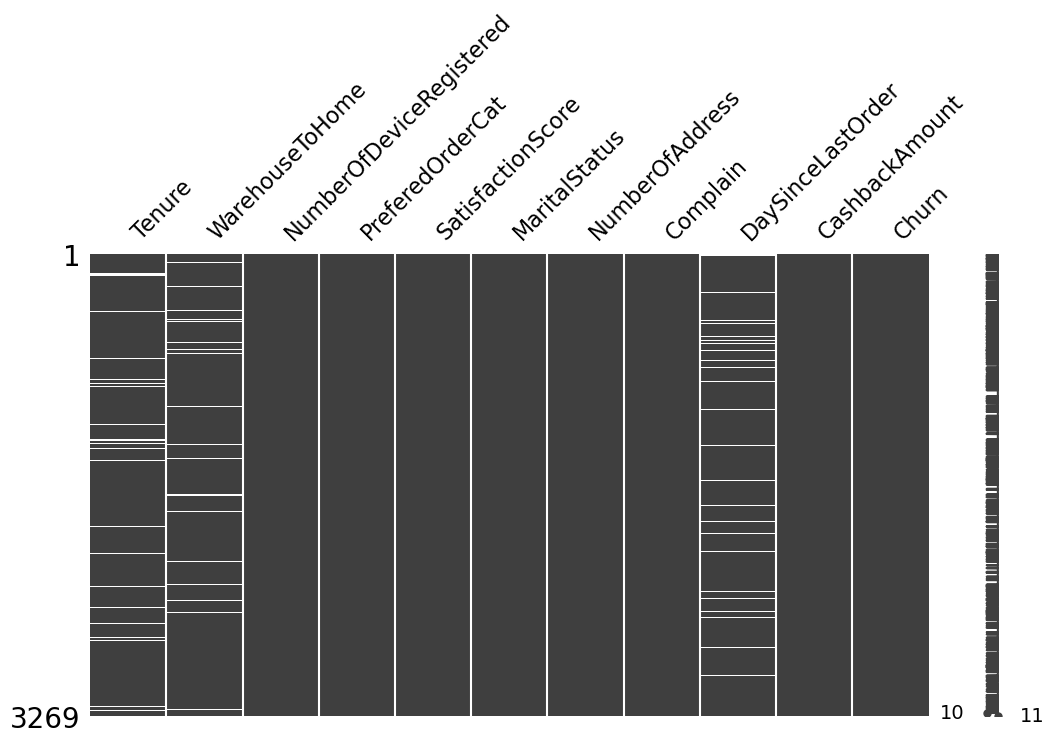

In [102]:
missingno.matrix(df, figsize=(12,6))
plt.show()

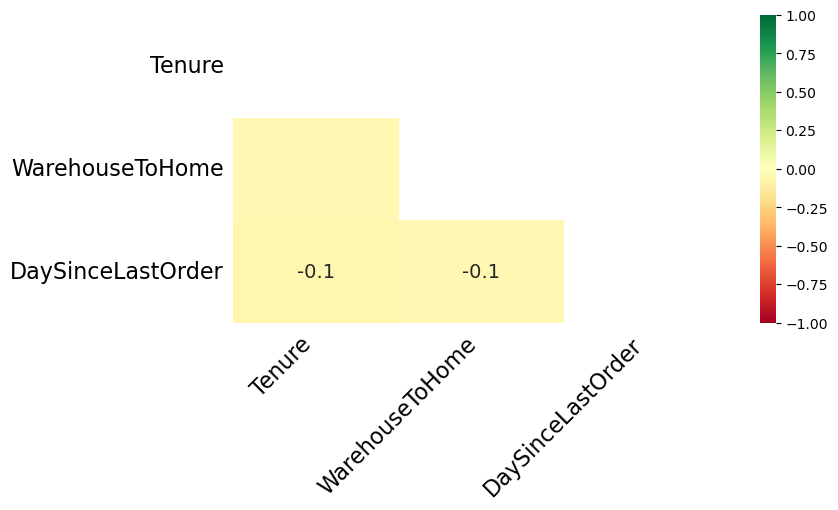

In [103]:
missingno.heatmap(df,figsize=(8,4), cmap="RdYlGn")
plt.show()

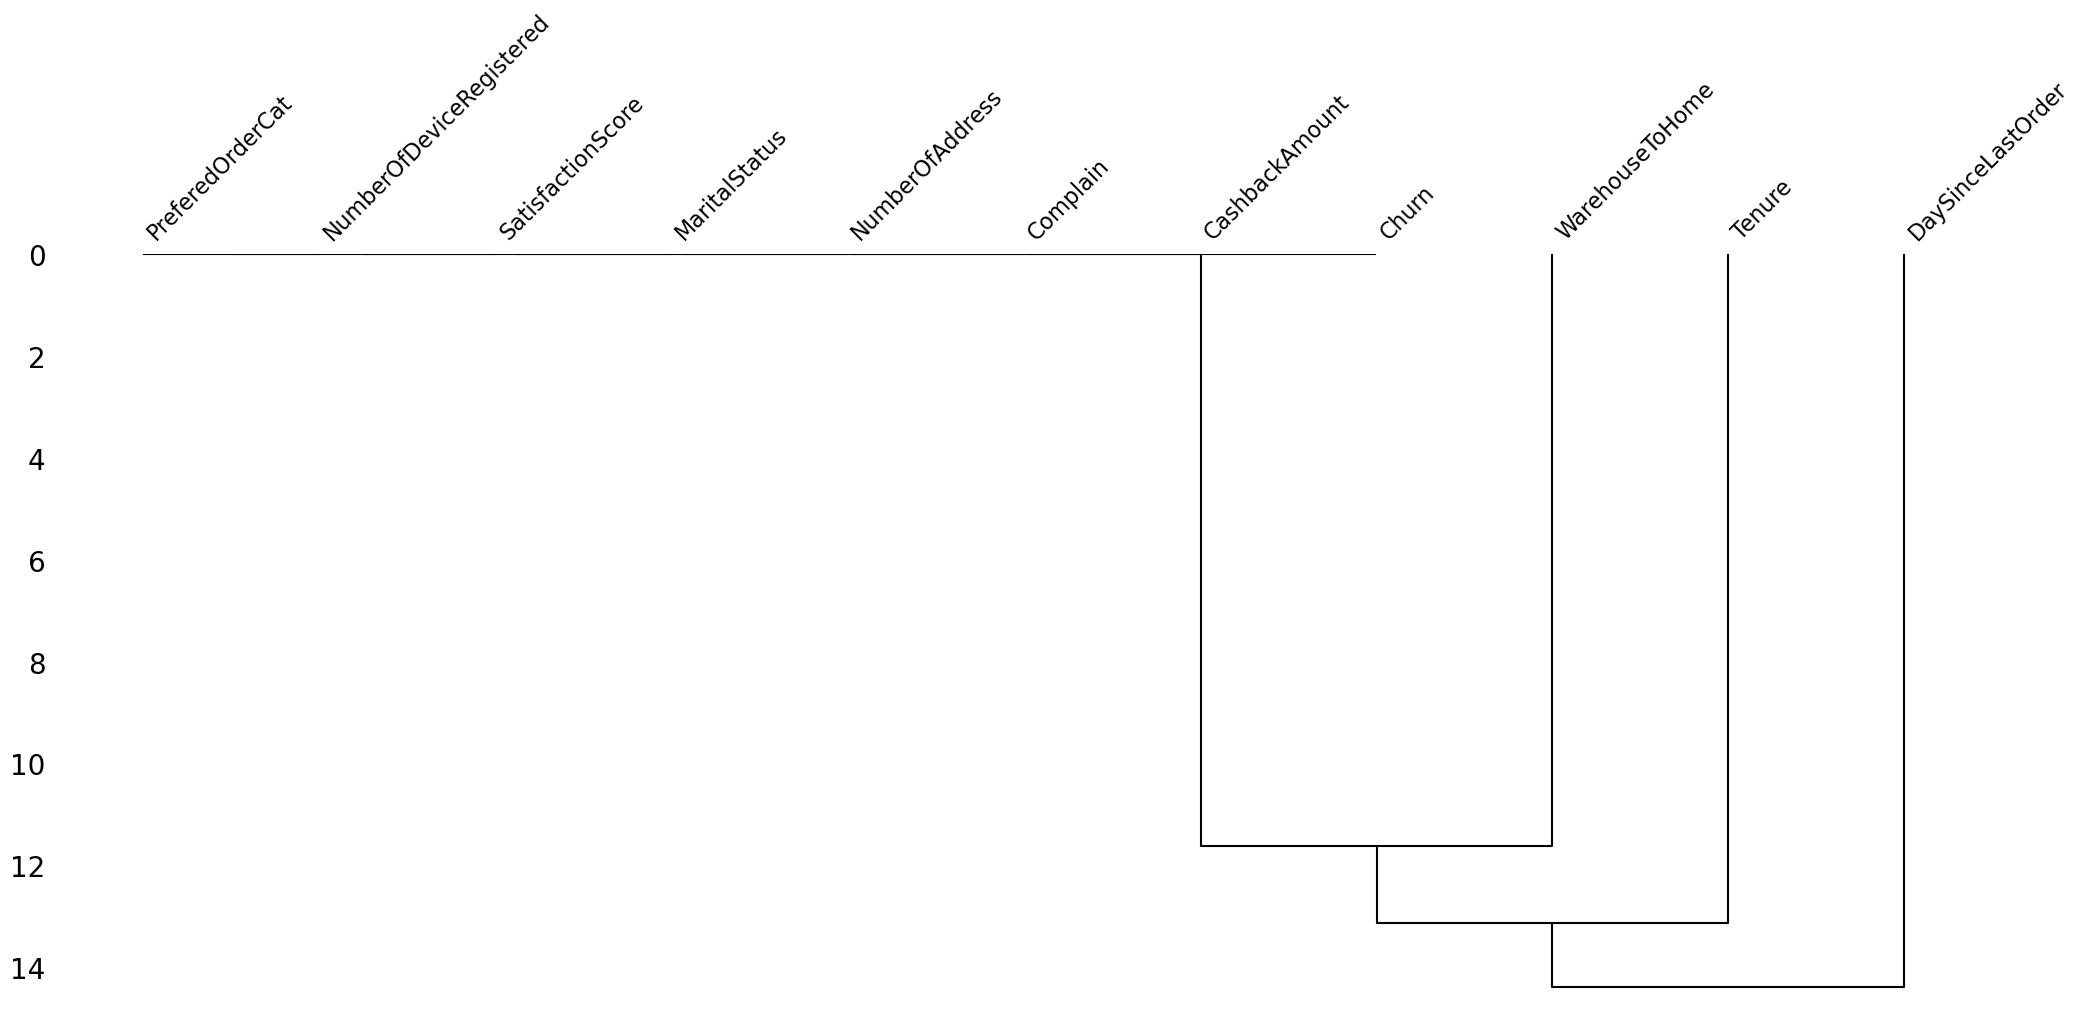

In [104]:
missingno.dendrogram(df)
plt.show()

The correlation between Tenure, WarehouseToHome, and DaySinceLastOrder is very weak (around –0.1).
This suggests that these features are mostly independent — meaning you can safely keep all of them in the model without concern for multicollinearity.

#### Basic Data Cleanind Finished

#### Emergency Backup

In [105]:
df_backup = df.copy()

# EDA

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3134 non-null   float64
 2   NumberOfDeviceRegistered  3269 non-null   int64  
 3   PreferedOrderCat          3269 non-null   object 
 4   SatisfactionScore         3269 non-null   int64  
 5   MaritalStatus             3269 non-null   object 
 6   NumberOfAddress           3269 non-null   int64  
 7   Complain                  3269 non-null   int64  
 8   DaySinceLastOrder         3088 non-null   float64
 9   CashbackAmount            3269 non-null   float64
 10  Churn                     3269 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.5+ KB


#### Churn by marital Status

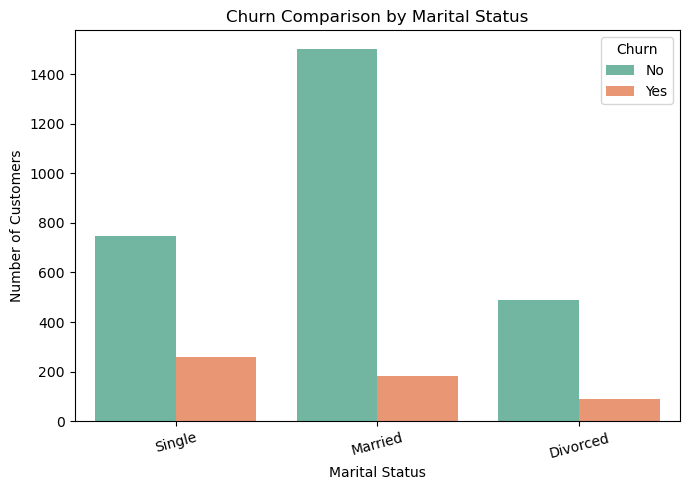

In [107]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='MaritalStatus', hue='Churn', palette='Set2')
plt.title('Churn Comparison by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Prefered Order Category with Churn

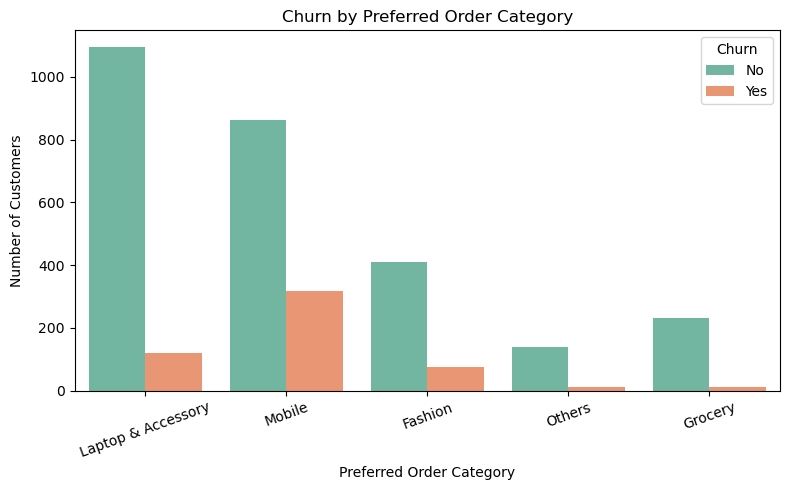

In [108]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PreferedOrderCat', hue='Churn', palette='Set2')
plt.title('Churn by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Days Since last order and Churn

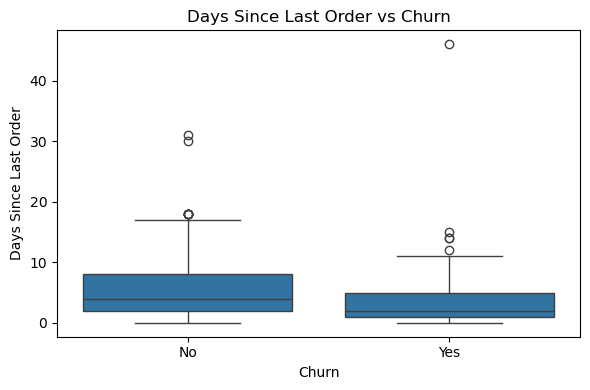

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='DaySinceLastOrder')
plt.title('Days Since Last Order vs Churn')
plt.xlabel('Churn')
plt.ylabel('Days Since Last Order')
plt.xticks([0,1], ['No', 'Yes']) 
plt.tight_layout()
plt.show()


### Preferd Cat and Marital Status

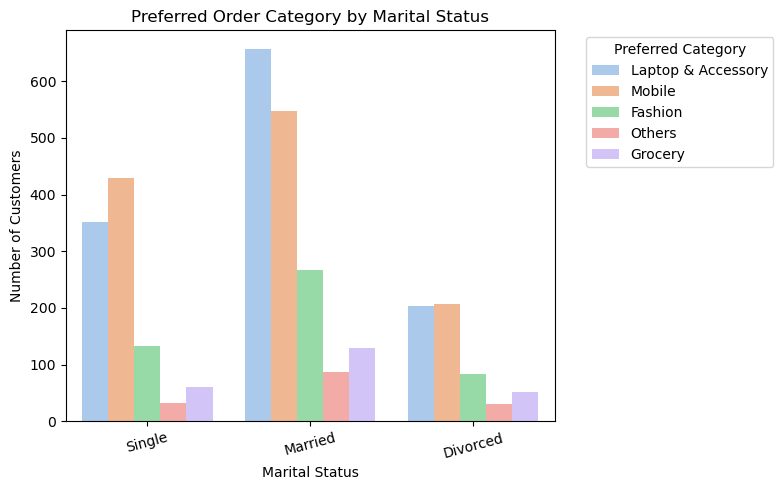

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='MaritalStatus', hue='PreferedOrderCat', palette='pastel')
plt.title('Preferred Order Category by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.legend(title='Preferred Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Satisfaction with Churn

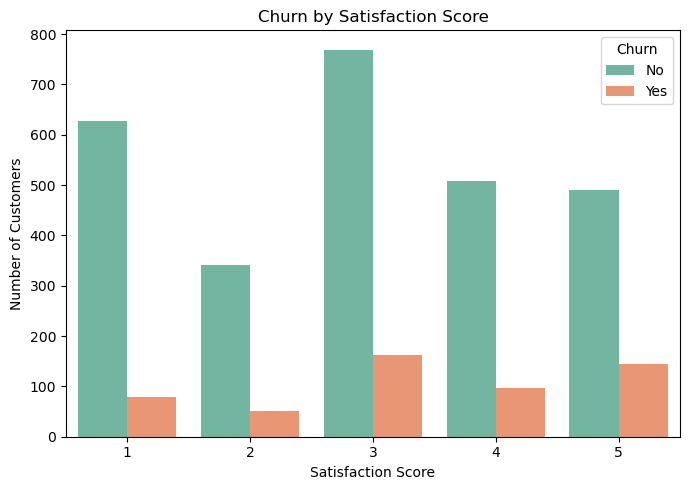

In [111]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='SatisfactionScore', hue='Churn', palette='Set2')
plt.title('Churn by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


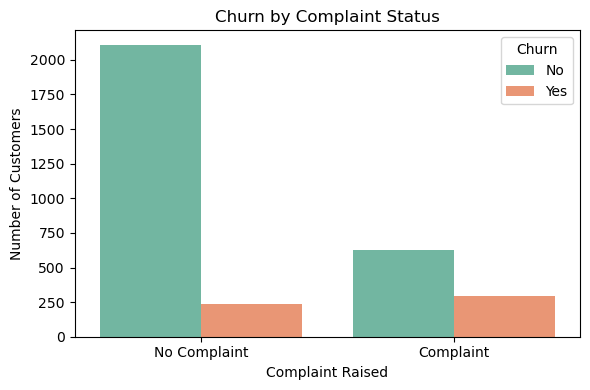

In [112]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Complain', hue='Churn', palette='Set2')
plt.title('Churn by Complaint Status')
plt.xlabel('Complaint Raised')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks([0,1], ['No Complaint', 'Complaint'])
plt.tight_layout()
plt.show()


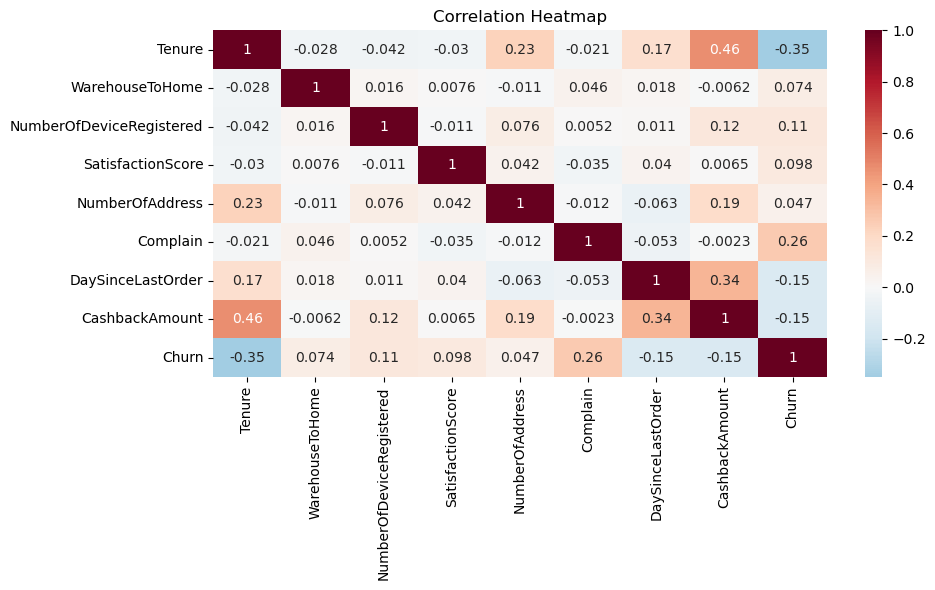

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# Preparing Data

### Removing Outlier

In [114]:
df.shape

(3269, 11)

In [115]:
cols = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    print(f"📊 {col}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers Detected: {outlier_count} ({outlier_count / len(df):.2%})")
    print("-" * 50)


📊 Tenure
  Q1: 2.00
  Q3: 16.00
  IQR: 14.00
  Lower Bound: -19.00
  Upper Bound: 37.00
  Outliers Detected: 4 (0.12%)
--------------------------------------------------
📊 WarehouseToHome
  Q1: 9.00
  Q3: 20.00
  IQR: 11.00
  Lower Bound: -7.50
  Upper Bound: 36.50
  Outliers Detected: 1 (0.03%)
--------------------------------------------------
📊 NumberOfAddress
  Q1: 2.00
  Q3: 6.00
  IQR: 4.00
  Lower Bound: -4.00
  Upper Bound: 12.00
  Outliers Detected: 3 (0.09%)
--------------------------------------------------
📊 DaySinceLastOrder
  Q1: 2.00
  Q3: 7.00
  IQR: 5.00
  Lower Bound: -5.50
  Upper Bound: 14.50
  Outliers Detected: 40 (1.22%)
--------------------------------------------------


In [116]:
outlier_indices = set()

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices.update(outliers)

# Drop all rows with outliers
df = df.drop(index=outlier_indices).reset_index(drop=True)

In [117]:
df.shape

(3221, 11)

To avoid losing a significant amount of valuable data, I only removed outliers from features with relatively few extreme values. I chose not to remove outliers from features with a high number of outliers, as this would have resulted in excessive data loss and could negatively impact model performance.

# "THIS ARE CODE FROM BELOW TO INCREASE FEATURE"

In [118]:
df['Service_Utilization_Rate'] = df['Tenure'] / (df['DaySinceLastOrder'] + 1)
df['Cashback_Efficiency'] = df['CashbackAmount'] / (df['NumberOfDeviceRegistered'] + 1)
df['Address_Stability_Index'] = df['Tenure'] / (df['NumberOfAddress'] + 1)
df['MultiDevice_Complainer'] = ((df['NumberOfDeviceRegistered'] > 3) & (df['Complain'] == 1)).astype(int)
df['Value_Tenure_Ratio'] = df['CashbackAmount'] / (df['Tenure'] + 1)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Service_Utilization_Rate,Cashback_Efficiency,Address_Stability_Index,MultiDevice_Complainer,Value_Tenure_Ratio
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,1.875000,28.664,5.000000,0,8.957500
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,0.875000,25.858,2.333333,0,16.161250
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,3.375000,42.135,4.500000,0,6.019286
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,NaN,46.054,2.500000,0,10.965238
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,3.333333,64.434,3.333333,0,10.392581


### Define XY before Encoding, Adjusting Missing Value, and etc

In [119]:
X = df.drop(columns=['Churn'])
y = df['Churn']

We need to handle missing values, encoding, and scaling after splitting the data to avoid data leakage.
If we clean or transform the entire dataset before splitting, the model might accidentally learn patterns from the test set.
This can make the model seem more accurate than it really is.
By splitting first, and then fitting the transformations only on the training data, we make sure the test set stays unseen and gives a fair evaluation.

### Data Splitting

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2576 entries, 66 to 3020
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    2450 non-null   float64
 1   WarehouseToHome           2477 non-null   float64
 2   NumberOfDeviceRegistered  2576 non-null   int64  
 3   PreferedOrderCat          2576 non-null   object 
 4   SatisfactionScore         2576 non-null   int64  
 5   MaritalStatus             2576 non-null   object 
 6   NumberOfAddress           2576 non-null   int64  
 7   Complain                  2576 non-null   int64  
 8   DaySinceLastOrder         2422 non-null   float64
 9   CashbackAmount            2576 non-null   float64
 10  Service_Utilization_Rate  2296 non-null   float64
 11  Cashback_Efficiency       2576 non-null   float64
 12  Address_Stability_Index   2450 non-null   float64
 13  MultiDevice_Complainer    2576 non-null   int32  
 14  Value_Tenure

### Data Preprocessing|

### Missing Value

In [122]:
round((X_train.isnull().sum()*100 / X_train.shape[0]),2)

Tenure                       4.89
WarehouseToHome              3.84
NumberOfDeviceRegistered     0.00
PreferedOrderCat             0.00
SatisfactionScore            0.00
MaritalStatus                0.00
NumberOfAddress              0.00
Complain                     0.00
DaySinceLastOrder            5.98
CashbackAmount               0.00
Service_Utilization_Rate    10.87
Cashback_Efficiency          0.00
Address_Stability_Index      4.89
MultiDevice_Complainer       0.00
Value_Tenure_Ratio           4.89
dtype: float64

In [123]:
miss_cols = ['WarehouseToHome', 'Tenure', 'DaySinceLastOrder']

TEnure missing value

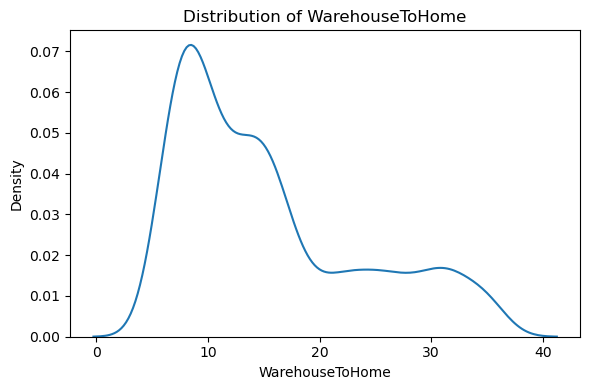

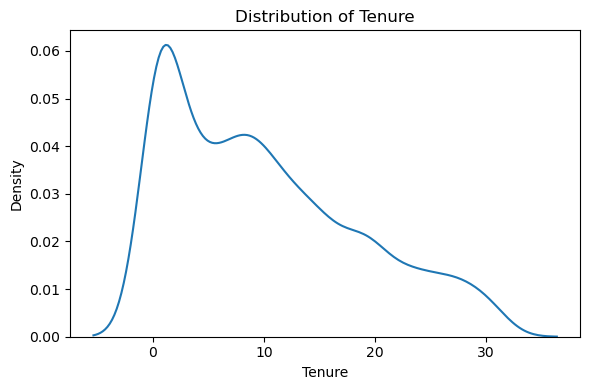

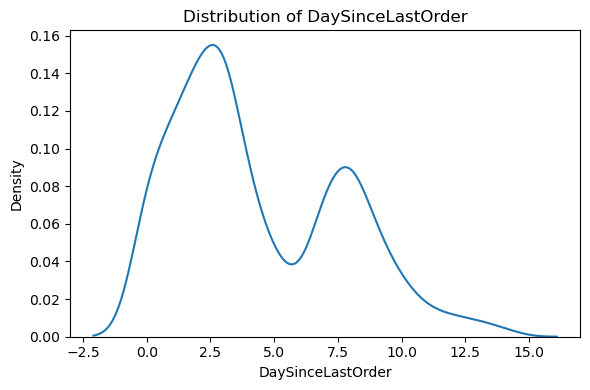

In [124]:
for col in miss_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

### Checking for Churn distribution for Imbalance

In [125]:
class_distribution = pd.DataFrame({
    'Count': y_train.value_counts(),
    'Percentage': y.value_counts(normalize=True) * 100
})

print("Class Distribution:")
print(class_distribution)

Class Distribution:
       Count  Percentage
Churn                   
0       2152   83.545483
1        424   16.454517


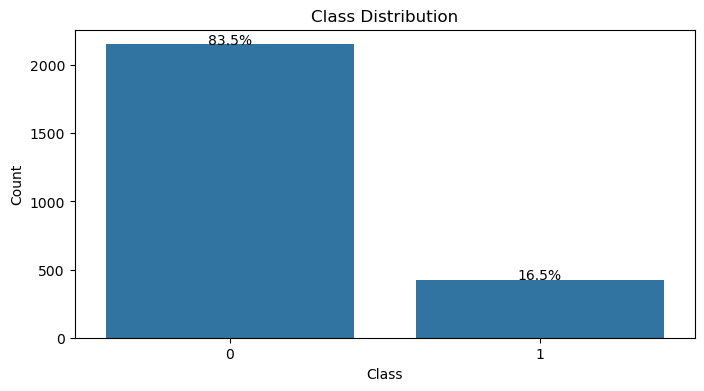

In [126]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

total = len(y_train) #Persen
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 3,
                   f'{height/total:.1%}',
                   ha='center')

plt.show()

# PIPELINE PREPARATION

### Column name

In [127]:
X_train.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Service_Utilization_Rate,Cashback_Efficiency,Address_Stability_Index,MultiDevice_Complainer,Value_Tenure_Ratio
66,1.0,16.0,3,Laptop & Accessory,3,Single,4,0,7.0,136.60,0.125000,34.150,0.200000,0,68.300000
744,21.0,11.0,5,Fashion,4,Married,10,1,NaN,228.33,NaN,38.055,1.909091,1,10.378636
2162,16.0,9.0,4,Grocery,3,Divorced,2,1,11.0,303.61,1.333333,60.722,5.333333,1,17.859412
2978,NaN,8.0,3,Mobile,5,Married,7,1,2.0,120.42,NaN,30.105,NaN,0,NaN
1642,0.0,7.0,4,Mobile,3,Married,2,1,0.0,129.33,0.000000,25.866,0.000000,1,129.330000


In [128]:
numeric_features = [
    'Tenure',
    'WarehouseToHome',
    'CashbackAmount',
    'Service_Utilization_Rate',
    'Cashback_Efficiency',
    'Address_Stability_Index',
    'Value_Tenure_Ratio'
]
ordinal_features = [
    'SatisfactionScore',         
    'NumberOfDeviceRegistered',    
    'NumberOfAddress'              
]
categorical_features = [
    'PreferedOrderCat',
    'MaritalStatus'
]
binary_features = [
    'Complain',
    'MultiDevice_Complainer',     
]

### transformer Pipline

In [129]:
# Numeri
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Ordina
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(
        categories=[
            [1, 2, 3, 4, 5],                      
            [1, 2, 3, 4, 5, 6],                   
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]   
        ],
        handle_unknown='use_encoded_value', 
        unknown_value=-1,                 
        dtype=int                          
    ))
])
# Categorica
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'))
])

# Binary
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])


### Transform PREPPROCESSOR

In [130]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('ordinal', ordinal_pipeline, ordinal_features),
    ('cat', categorical_pipeline, categorical_features),
    ('binary', binary_pipeline, binary_features)
])


In [131]:
ratio = sum(y_train == 0) / sum(y_train == 1)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight= ratio, eval_metric='logloss'), # pos weight according to ration or percentage
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100)
}




# Preparing Models

To build robust classification models, I selected four tree-based algorithms: Decision Tree, Random Forest, XGBoost, and AdaBoost. These models were chosen because they are inherently resistant to outliers and do not require strict feature scaling. This is especially important in my case, as I decided not to remove outliers in features like CashbackAmount. Removing them would lead to unnecessary data loss, and using models that can tolerate these extreme values ensures that model performance remains stable and fair.

### SKFOLD CV

In [132]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []  # CV metrics
test_results = []  # Final test metric

I used Stratified K-Fold to handle the class imbalance by making sure each fold has the same proportion of churn and non-churn customers during cross-validation.

### CV EVAL

In [133]:
def evaluate_model(pipeline, X, y):
    cv_metrics = cross_validate(
        pipeline, X, y, cv=skf,
        scoring=['f1', 'roc_auc', 'accuracy', 'precision', 'recall'],
        return_train_score=True,
        n_jobs=-1
    )
    return {
        'F1 (CV)': np.mean(cv_metrics['test_f1']),
        'ROC AUC (CV)': np.mean(cv_metrics['test_roc_auc']),
        'Precision (CV)': np.mean(cv_metrics['test_precision']),
        'Recall (CV)': np.mean(cv_metrics['test_recall'])
    }

results = []
for name, model in models.items():
    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # CV
    cv_metrics = evaluate_model(pipeline, X_train, y_train)
    
    # Test evaluation
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    results.append({
        'Model': name,
        **cv_metrics,
        'F1 (Test)': f1_score(y_test, y_pred, pos_label=1),
        'ROC AUC (Test)': roc_auc_score(y_test, y_proba),
        'Precision (Test)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Test)': recall_score(y_test, y_pred, pos_label=1)
    })

results_df = pd.DataFrame(results).set_index('Model')

In [134]:
results_df

,F1 (CV),ROC AUC (CV),Precision (CV),Recall (CV),F1 (Test),ROC AUC (Test),Precision (Test),Recall (Test)
Model,,,,,,,,
Decision Tree,0.575392,0.832102,0.471526,0.742941,0.612546,0.889707,0.503030,0.783019
Random Forest,0.681082,0.924933,0.721426,0.648824,0.745098,0.940368,0.775510,0.716981
XGBoost,0.704111,0.927778,0.675318,0.735994,0.739726,0.948384,0.716814,0.764151
AdaBoost,0.619659,0.885859,0.550945,0.709916,0.688797,0.912163,0.614815,0.783019


### Summary of Model Performance

#### 1. Decision Tree

* Cross-validation F1: 0.575 (lowest among all models)
* Test F1: 0.613, Precision: 0.503, Recall: 0.783
* Weak precision and overall performance; likely overfitting or underfitting.

#### 2. Random Forest

* Cross-validation F1: 0.681, ROC AUC: 0.925
* Test F1: 0.745, Precision: 0.776, Recall: 0.717
* Strong and balanced performance on both CV and test set.

#### 3. XGBoost

* Cross-validation F1: 0.704 (highest), ROC AUC: 0.928
* Test F1: 0.740, Precision: 0.717, Recall: 0.764, ROC AUC: 0.948
* Best overall model with strong performance across all metrics.

#### 4. AdaBoost

* Cross-validation F1: 0.620, ROC AUC: 0.886
* Test F1: 0.689, Precision: 0.615, Recall: 0.783
* High recall, but lower precision; suitable when minimizing false negatives is a priority.


## Hyperparameter Tuning Using XGBBoost since it the Highest Performance

I chose to tune XGBoost because it performed well in cross-validation and is known for handling imbalanced data, capturing complex patterns, and reducing overfitting. Tuning its parameters helps maximize performance on churn prediction.

### Hyperparameter with GridSearchCV

In [135]:
from sklearn.metrics import make_scorer, f1_score

In [136]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

param_grid = {
    'classifier__scale_pos_weight': [4.5, 5.08, 5.5],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8],
    'classifier__reg_alpha': [0, 0.1, 1],
    'classifier__reg_lambda': [0, 0.1, 1]
}

scorer = make_scorer(f1_score, pos_label=1)

grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,
    n_jobs=-1,
    verbose=2,
    refit=True
)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits

 Evaluation (GridSearch XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       539
           1       0.74      0.77      0.76       106

    accuracy                           0.92       645
   macro avg       0.85      0.86      0.85       645
weighted avg       0.92      0.92      0.92       645

ROC AUC: 0.9452


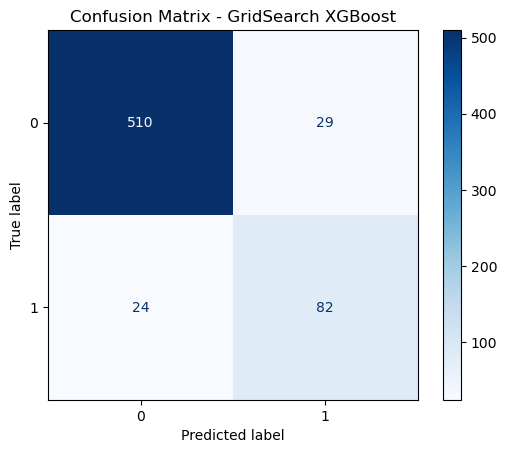

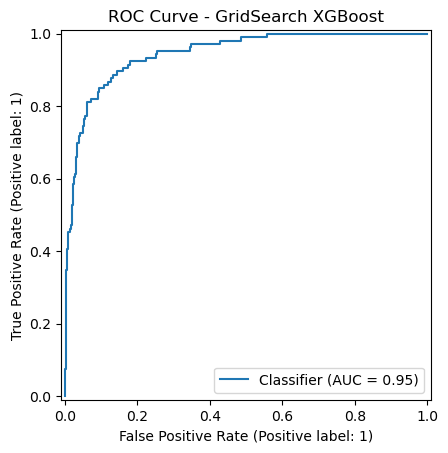

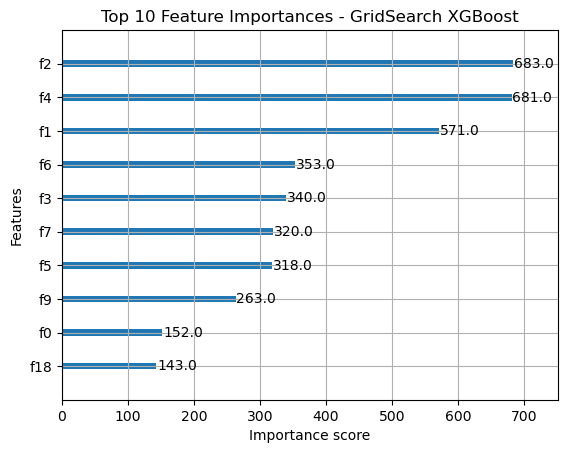

In [137]:
grid.fit(X_train, y_train)

best_params = {k.replace('classifier__', ''): v for k, v in grid.best_params_.items()}

#XGB Classivier
best_xgb = XGBClassifier(
    **best_params,
    eval_metric='logloss',
    early_stopping_rounds=10,
    random_state=42,
    n_jobs=-1
)

# tuning xgb pipeline
xgb_tune_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_xgb)
])

# validation
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2, random_state=42
)

#train
xgb_tune_pipeline.fit(
    X_train2, y_train2,
    classifier__eval_set=[(preprocessor.transform(X_val), y_val)],
    classifier__verbose=False
)

# evaluation
y_pred = xgb_tune_pipeline.predict(X_test)
y_proba = xgb_tune_pipeline.predict_proba(X_test)[:, 1]

# output
print("\n Evaluation (GridSearch XGBoost):")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

#VISUALISATION
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - GridSearch XGBoost")
plt.show()


RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - GridSearch XGBoost")
plt.show()


plot_importance(xgb_tune_pipeline.named_steps['classifier'], max_num_features=10)
plt.title("Top 10 Feature Importances - GridSearch XGBoost")
plt.show()


### Hyperparameter Tuning using RandomSearchCV

To further optimize the model's performance, I explored an alternative hyperparameter tuning strategy using RandomizedSearchCV in addition to GridSearch, allowing a broader search across the parameter space with fewer computational resources.

In [138]:

# new param since prama grid and param dist are not the same
param_dist = {
    'classifier__scale_pos_weight': [4.5, 5.08, 5.5],
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__reg_alpha': uniform(0, 5),
    'classifier__reg_lambda': uniform(0, 5)
}

# xgb pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

# initiate randomsearc
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring=make_scorer(f1_score, pos_label=1),
    n_jobs=-1,
    verbose=2,
    random_state=42,
    refit=True
)

#RUNN
random_search.fit(X_train, y_train)


best_params = {k.replace('classifier__', ''): v for k, v in random_search.best_params_.items()}

randsrch_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        **best_params,
        eval_metric='logloss',
        early_stopping_rounds=10,
        random_state=42,
        n_jobs=-1
    ))
])

X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    test_size=0.2,
    random_state=42
)

randsrch_pipeline.fit(
    X_train2, y_train2,
    classifier__eval_set=[(preprocessor.transform(X_val), y_val)],
    classifier__verbose=True
)

# Evaluate
y_pred = randsrch_pipeline.predict(X_test)
y_proba = randsrch_pipeline.predict_proba(X_test)[:, 1]
#output
print("\nFinal Evaluation (Random Search):")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[0]	validation_0-logloss:0.62571
[1]	validation_0-logloss:0.57209
[2]	validation_0-logloss:0.52799
[3]	validation_0-logloss:0.49607
[4]	validation_0-logloss:0.46752
[5]	validation_0-logloss:0.44533
[6]	validation_0-logloss:0.42323
[7]	validation_0-logloss:0.40755
[8]	validation_0-logloss:0.39393
[9]	validation_0-logloss:0.38202
[10]	validation_0-logloss:0.37073
[11]	validation_0-logloss:0.36510
[12]	validation_0-logloss:0.35606
[13]	validation_0-logloss:0.34818
[14]	validation_0-logloss:0.34097
[15]	validation_0-logloss:0.33616
[16]	validation_0-logloss:0.33188
[17]	validation_0-logloss:0.32599
[18]	validation_0-logloss:0.32137
[19]	validation_0-logloss:0.31923
[20]	validation_0-logloss:0.31585
[21]	validation_0-logloss:0.31323
[22]	validation_0-logloss:0.31126
[23]	validation_0-logloss:0.31007
[24]	validation_0-logloss:0.30745
[25]	validation_0-logloss:0.30619
[26]	validation_0-logloss:0.30389
[27]	validation_0-logloss:0.30

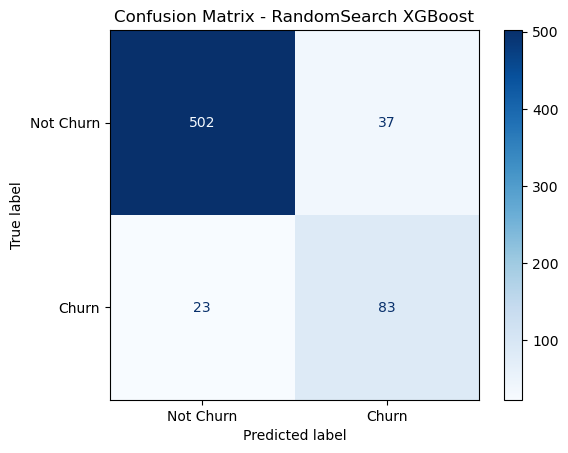

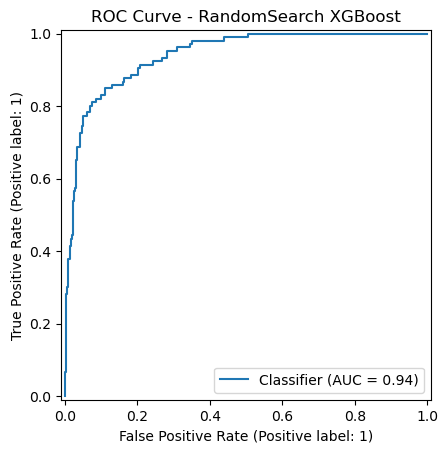

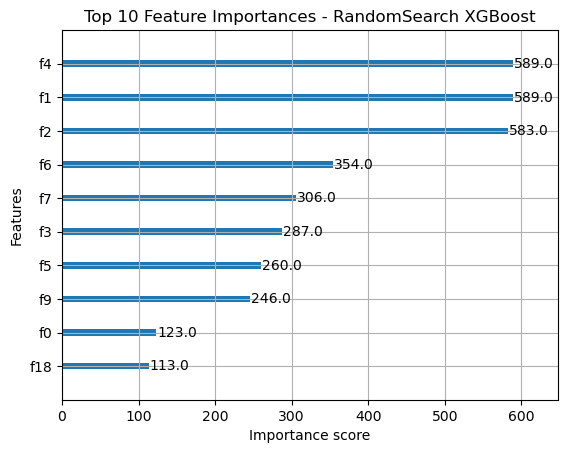

In [139]:
# VISUAL OUTPUT
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - RandomSearch XGBoost")
plt.show()

# 9. ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - RandomSearch XGBoost")
plt.show()

# 10. Feature Importance
plot_importance(randsrch_pipeline.named_steps['classifier'], max_num_features=10)
plt.title("Top 10 Feature Importances - RandomSearch XGBoost")
plt.show()

## USING ENSEMBLE for Higher performances

I selected Random Forest and XGBoost as base models combined with Logistic Regression as the final estimator in the stacking ensemble because, after testing various model combinations, this configuration consistently delivered the best overall performance.

In [141]:
# call best params
best_params = {
    k.replace('classifier__', ''): v 
    for k, v in random_search.best_params_.items()
}

# new xgb
xgb_base = XGBClassifier(
    **best_params,  
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# estimator
estimators = [
    ('xgb', xgb_base),
    ('rf', RandomForestClassifier(
        class_weight='balanced',
        max_depth=5,
        n_jobs=-1,
        random_state=42
    ))
]

# ENSEMBLE
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced'),
    cv=5,
    n_jobs=-1
)

# ENSEMBLE PIPELINE
ensemble_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', stacked_model)
])

# train and eval 
ensemble_pipeline.fit(X_train, y_train)
y_pred = ensemble_pipeline.predict(X_test)
# output
print("Stacked Ensemble Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, ensemble_pipeline.predict_proba(X_test)[:, 1]):.4f}")


Stacked Ensemble Performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       539
           1       0.71      0.83      0.77       106

    accuracy                           0.92       645
   macro avg       0.84      0.88      0.86       645
weighted avg       0.92      0.92      0.92       645

ROC AUC: 0.9534


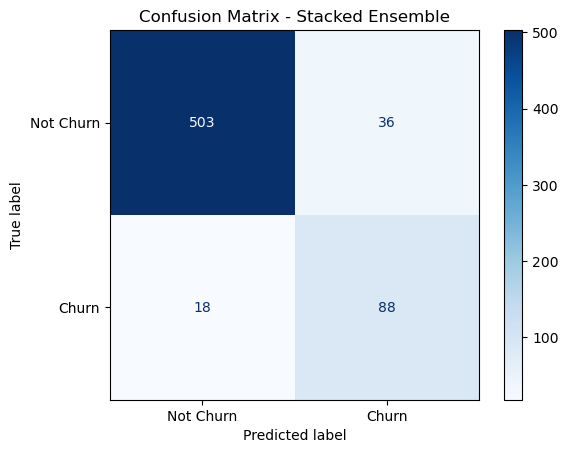

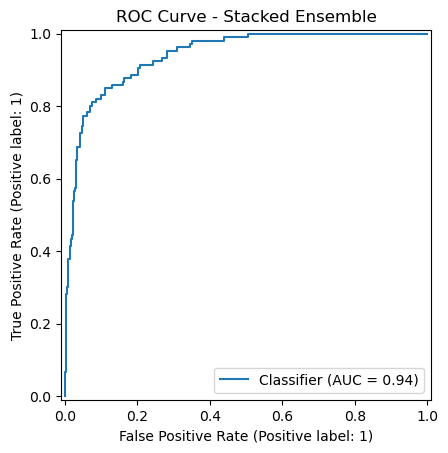

In [142]:
#Visual Output
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Stacked Ensemble")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Stacked Ensemble")
plt.show()


## **COMPARISON**

| Metric                  | **GridSearch XGBoost** | **RandomSearch XGBoost** | **Stacked Ensemble** |
| ----------------------- | ---------------------- | ------------------------ | -------------------- |
| **Accuracy**            | 0.92                   | 0.91                     | 0.92                 |
| **Recall (Class 1)**    | 0.77                   | 0.78                     | 0.83                 |
| **Precision (Class 1)** | 0.74                   | 0.69                     | 0.71                 |
| **F1-score (Class 1)**  | 0.76                   | 0.73                     | 0.77                 |
| **ROC AUC**             | 0.9452                 | 0.9405                   | **0.9534**           |

---

### **Summary**:

* **Stacked Ensemble** achieved the **highest ROC AUC (0.9534)** and best **recall (0.83)** for the minority class (Churn), making it suitable when prioritizing churner detection.
* **GridSearch XGBoost** had slightly better precision (0.74) and balanced metrics overall, showing strong general performance.
* **RandomSearch XGBoost** had decent performance but slightly lower precision and F1 compared to the others.


# Conclusion

I conducted hyperparameter tuning on XGBoost using both GridSearchCV and RandomizedSearchCV to optimize its performance in predicting customer churn. The tuning processes explored a wide range of parameter combinations, including scale_pos_weight, max_depth, learning_rate, subsample, and regularization terms, using F1 score as the primary evaluation metric with StratifiedKFold cross-validation to account for class imbalance.

XGBoost consistently delivered strong performance across both search methods, achieving high F1 scores and ROC AUC values, particularly for the minority churn class. To further enhance predictive power, I integrated XGBoost with Random Forest and Logistic Regression in a Stacked Ensemble model. This final ensemble achieved the highest recall and ROC AUC, confirming its robustness in identifying churners.

Based on these results, XGBoost was selected as the core model, both as a standalone classifier and as the base learner in the ensemble, due to its superior and consistent performance across multiple tuning strategies and evaluation metrics.

---
### Model Summary


**1. XGBoost with GridSearchCV:**

* **F1 Score (Test):** 0.76
* **ROC AUC (Test):** 0.9452
* **Precision (Test):** 0.73
* **Recall (Test):** 0.77
* **Improvement:**

  * F1 Score increased by **+0.0203**
  * Recall improved by **+0.0058**
  * More stable performance across cross-validation folds

---

**2. XGBoost with RandomizedSearchCV:**

* **F1 Score (Test):** 0.73
* **ROC AUC (Test):** 0.9405
* **Precision (Test):** 0.69
* **Recall (Test):** 0.78
* **Comparison:**

  * Slight decrease in precision compared to GridSearch
  * Recall slightly better than baseline
  * Lower AUC than GridSearch and baseline

---

**3. Stacked Ensemble (XGBoost + RandomForest + LogisticRegression):**

* **F1 Score (Test):** 0.77
* **ROC AUC (Test):** 0.9534
* **Precision (Test):** 0.71
* **Recall (Test):** 0.83
* **Improvement over Baseline:**

  * F1 Score increased by **+0.0303**
  * Recall improved by **+0.065**
  * Highest ROC AUC across all configurations
  * Best performance in detecting churners (recall)

---

### **Model Conclusion:**

* GridSearchCV tuning slightly improved overall performance.
* RandomizedSearchCV gave comparable recall, but lower precision.
* The best overall improvement came from the **Stacked Ensemble**, especially in **recall and AUC**, making it the most effective method for identifying churners.



---
### Bussiness Applicability
The final model — a stacked ensemble of XGBoost and Random Forest with Logistic Regression — achieved 92% accuracy, 83% recall for churners, and an AUC of 0.9534, indicating strong and balanced performance.

While it doesn’t detect all churners (a common challenge due to imbalanced data and limited behavioral features), it performs reliably enough to be used in real-world scenarios. Businesses can use this model to identify at-risk customers and support targeted retention strategies.

---
### Final Words:

This XGBoost-based models, especially after applying hyperparameter tuning and ensemble stacking, demonstrated strong performance in identifying churners. However, the recall did not reach 100%, which is expected in realistic churn prediction scenarios due to the following challenges:

* **Imbalanced Dataset:** Despite using techniques like `scale_pos_weight` and SMOTE, the minority class (churners) remains harder to learn. This class imbalance inherently limits the model’s recall.

* **Limited Feature Depth:** While new engineered features (e.g., `Service_Utilization_Rate`, `HighValue_AtRisk`) improved model performance, the dataset still lacks richer behavioral signals like customer lifetime value, transaction sequences, or time-based trends that could further refine churn detection.

* **Feature Generalization:** Many features are aggregated or static (e.g., satisfaction score, tenure), which might not capture recent shifts in customer behavior. This limits the model’s responsiveness to new churn signals.

* **Label Ambiguity:** The `Churn` label likely reflects predefined internal criteria, which may not capture all at-risk customers. This can introduce noise, reducing the upper bound of model performance.

Despite these limitations, the tuned and stacked models achieved a recall of up to **83%** with robust precision and ROC AUC, making them valuable for early intervention and targeted retention strategies.


In [143]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(ensemble_pipeline, file)

In [144]:
import os
print("Saved in:", os.getcwd())

Saved in: C:\Users\andia
